 ### Neural Network classification with Pytorch

* Classification is a problem predicting weather something is in thing or another thing

### 1.Make classification data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles


# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=100)

In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[-1.00038985  0.02348052]
 [-0.19036705 -1.01750748]
 [ 0.71463597  0.37954286]
 [ 0.60316858 -0.78886949]
 [ 0.56238969  0.56515025]]

First 5 y labels:
[0 0 1 0 1]


In [5]:
y

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [6]:
#make DataFrames of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(20)

,X1,X2,label
0,-1.000390,0.023481,0
1,-0.190367,-1.017507,0
2,0.714636,0.379543,1
3,0.603169,-0.788869,0
4,0.562390,0.565150,1
5,0.025748,1.006406,0
6,1.050432,-0.097989,0
7,0.623187,0.525558,1
8,0.747905,-0.180497,1
9,0.559672,-0.620578,1


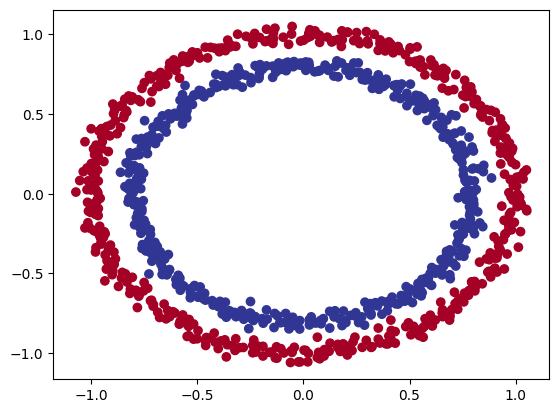

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

Note: The data we are working with is often reffered to as a toy dataset,a dataset that is smallenough to experiment but still sizable enougg to practice the fundamentals

### Check input and output shapes

In [8]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X

array([[-1.00038985,  0.02348052],
       [-0.19036705, -1.01750748],
       [ 0.71463597,  0.37954286],
       ...,
       [-0.34854069, -0.73386791],
       [-0.69073184, -0.39968317],
       [ 0.74728993,  0.23031586]])

In [10]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [-1.00038985  0.02348052] and the same for y: 0
Shapes for one sample of X: (2,) and the same for y: ()


### Turn data into tensors and create train and test splits

In [20]:
# Assuming X and y are your NumPy arrays
import torch

# Convert NumPy arrays to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# View the first five samples
print(X[:5])
print(y[:5])


tensor([[-1.0004,  0.0235],
        [-0.1904, -1.0175],
        [ 0.7146,  0.3795],
        [ 0.6032, -0.7889],
        [ 0.5624,  0.5652]])
tensor([0., 0., 1., 0., 1.])


<ipython-input-20-e4421872481e>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
<ipython-input-20-e4421872481e>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


In [18]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [19]:
torch.manual_seed(100)

In [21]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=100) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [22]:
n_samples

1000

**2. Building a model**

* Setting up device agnostic code (so our model can run on CPU or GPU if it's available).

* Constructing a model by subclassing nn.Module.

* Defining a loss function and optimizer.

* Creating a training loop (this'll be in the next section).

In [23]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [24]:
X_train

tensor([[ 1.0185,  0.1074],
        [ 0.1258, -0.9372],
        [ 0.0194,  0.9787],
        ...,
        [-1.0000,  0.4072],
        [-0.2295,  1.0047],
        [-0.8570, -0.5282]])

Now we have setup device agnostic code,lets create a model that:

* Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).

* Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.

* Defines a forward() method containing the forward pass computation of the model.

* Instantiates the model class and sends it to the target device.


In [25]:
X_train.shape

torch.Size([800, 2])

In [26]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):

        return self.layer_2(self.layer_1(x))

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [27]:
device

'cuda'

In [28]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [29]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [30]:
model_0.state_dict

<bound method Module.state_dict of Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)>

In [31]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.5652],
        [-0.4955],
        [-0.8989],
        [-0.8899],
        [-0.8956],
        [-0.5636],
        [-0.6716],
        [-0.5165],
        [-0.7244],
        [-0.8888]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 1., 0., 1., 1., 1., 1., 0., 0., 1.])


In [32]:
X_test[:10],y_test[:10]

(tensor([[-0.2484, -0.7495],
         [ 0.4466, -0.6914],
         [ 0.0756,  0.9939],
         [-0.3040,  0.7414],
         [-0.5697,  0.6210],
         [ 0.7637, -0.1966],
         [ 0.7388,  0.2958],
         [ 0.9204, -0.3304],
         [-0.9340, -0.3829],
         [-0.5161,  0.6187]]),
 tensor([1., 1., 0., 1., 1., 1., 1., 0., 0., 1.]))

### Setup loss function and optimizer

In [33]:

# Create a loss function

loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)



In [35]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

### Train model

* Forward pass

* Calculate the loss

* Zero gradients

* Perform backpropagation on the loss

* Step the optimizer (gradient descent)

### Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

In [36]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [37]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.5652],
        [-0.4955],
        [-0.8989],
        [-0.8899],
        [-0.8956]], device='cuda:0', grad_fn=<SliceBackward0>)

In [38]:
y_test[:5]

tensor([1., 1., 0., 1., 1.])

In [39]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3624],
        [0.3786],
        [0.2893],
        [0.2911],
        [0.2900]], device='cuda:0', grad_fn=<SigmoidBackward0>)

 prediction probability values need to perform a range style rounding on them

* y_pred_probs>=0.5,y=1(class 1)

* y_pred_probs>=0.5,y=1(class 0)



In [40]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [41]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [42]:
y_test[:5]

tensor([1., 1., 0., 1., 1.])

### Building a training and testing loop

In [45]:
torch.manual_seed(100)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy

    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69410, Accuracy: 52.12% | Test loss: 0.69233, Test acc: 55.00%
Epoch: 10 | Loss: 0.69394, Accuracy: 53.75% | Test loss: 0.69271, Test acc: 52.50%
Epoch: 20 | Loss: 0.69380, Accuracy: 54.75% | Test loss: 0.69305, Test acc: 54.50%
Epoch: 30 | Loss: 0.69367, Accuracy: 59.38% | Test loss: 0.69337, Test acc: 57.00%
Epoch: 40 | Loss: 0.69355, Accuracy: 57.00% | Test loss: 0.69367, Test acc: 55.00%
Epoch: 50 | Loss: 0.69344, Accuracy: 51.12% | Test loss: 0.69396, Test acc: 45.50%
Epoch: 60 | Loss: 0.69334, Accuracy: 51.12% | Test loss: 0.69423, Test acc: 45.50%
Epoch: 70 | Loss: 0.69325, Accuracy: 51.12% | Test loss: 0.69450, Test acc: 45.50%
Epoch: 80 | Loss: 0.69317, Accuracy: 51.12% | Test loss: 0.69476, Test acc: 45.50%
Epoch: 90 | Loss: 0.69309, Accuracy: 51.12% | Test loss: 0.69501, Test acc: 45.50%


In [46]:
loss_fn

BCEWithLogitsLoss()

### Make predictions and evaluate the model

In [47]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

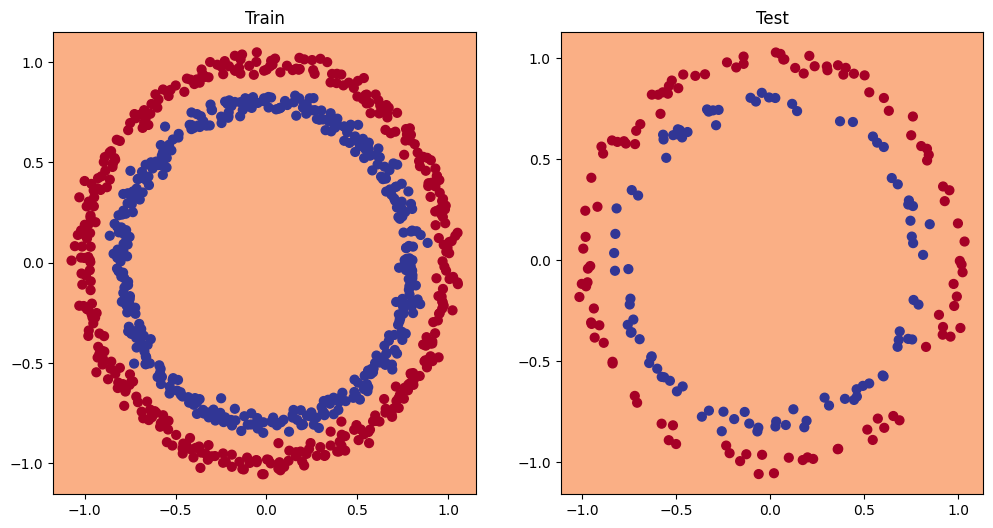

In [48]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### Improving a model (from a model perspective)

* add mode layers

* add more hidden units

* fit for longer

* changing the activation function

* changing learning rate

* changing loss function



In [49]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4186,  0.2028],
                      [ 0.6426,  0.0218],
                      [ 0.6741,  0.2169],
                      [-0.0289, -0.3236],
                      [ 0.2968, -0.0043]])),
             ('0.bias', tensor([-0.2462,  0.4863, -0.2084, -0.6091, -0.4099])),
             ('1.weight',
              tensor([[ 0.3124,  0.2313, -0.3211,  0.0182, -0.1386]])),
             ('1.bias', tensor([-0.1005]))])

In [51]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [52]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4186,  0.2028],
                      [ 0.6426,  0.0218],
                      [ 0.6741,  0.2169],
                      [-0.0289, -0.3236],
                      [ 0.2968, -0.0043]])),
             ('0.bias', tensor([-0.2462,  0.4863, -0.2084, -0.6091, -0.4099])),
             ('1.weight',
              tensor([[ 0.3124,  0.2313, -0.3211,  0.0182, -0.1386]])),
             ('1.bias', tensor([-0.1005]))])

In [53]:
#create a loss function
loss_fn=nn.BCEWithLogitsLoss()
#create optimizer
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [54]:
torch.manual_seed(100)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.70153, Accuracy: 52.62% | Test loss: 0.70504, Test acc: 51.50%
Epoch: 100 | Loss: 0.69304, Accuracy: 52.12% | Test loss: 0.70171, Test acc: 46.50%
Epoch: 200 | Loss: 0.69233, Accuracy: 53.37% | Test loss: 0.70223, Test acc: 44.50%
Epoch: 300 | Loss: 0.69221, Accuracy: 53.75% | Test loss: 0.70223, Test acc: 42.50%
Epoch: 400 | Loss: 0.69218, Accuracy: 54.37% | Test loss: 0.70218, Test acc: 42.00%
Epoch: 500 | Loss: 0.69218, Accuracy: 54.12% | Test loss: 0.70215, Test acc: 42.00%
Epoch: 600 | Loss: 0.69218, Accuracy: 54.12% | Test loss: 0.70213, Test acc: 42.00%
Epoch: 700 | Loss: 0.69218, Accuracy: 54.00% | Test loss: 0.70213, Test acc: 42.00%
Epoch: 800 | Loss: 0.69218, Accuracy: 54.12% | Test loss: 0.70212, Test acc: 42.00%
Epoch: 900 | Loss: 0.69218, Accuracy: 54.12% | Test loss: 0.70212, Test acc: 42.00%


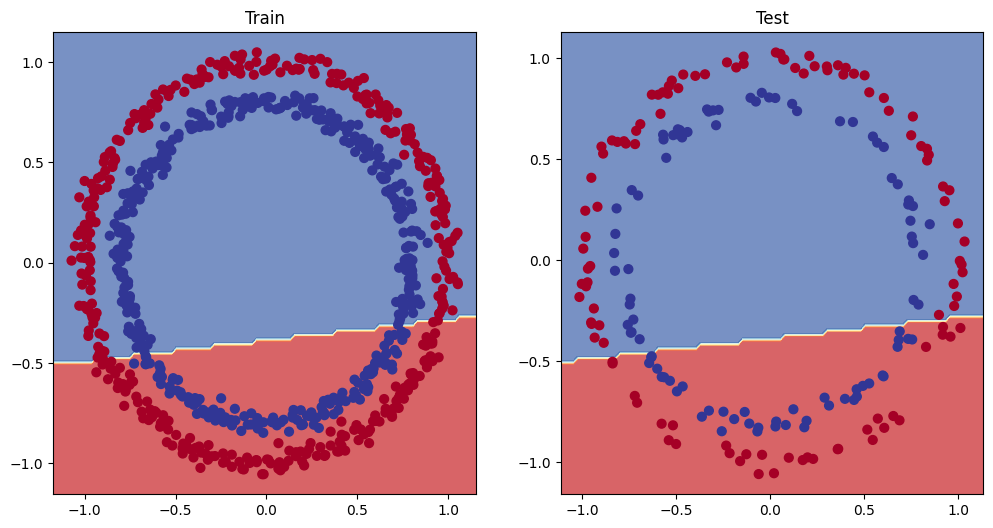

In [55]:
#plot the decision boundry
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)


### Preparing data to see if our model can model a straight line



In [57]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [58]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


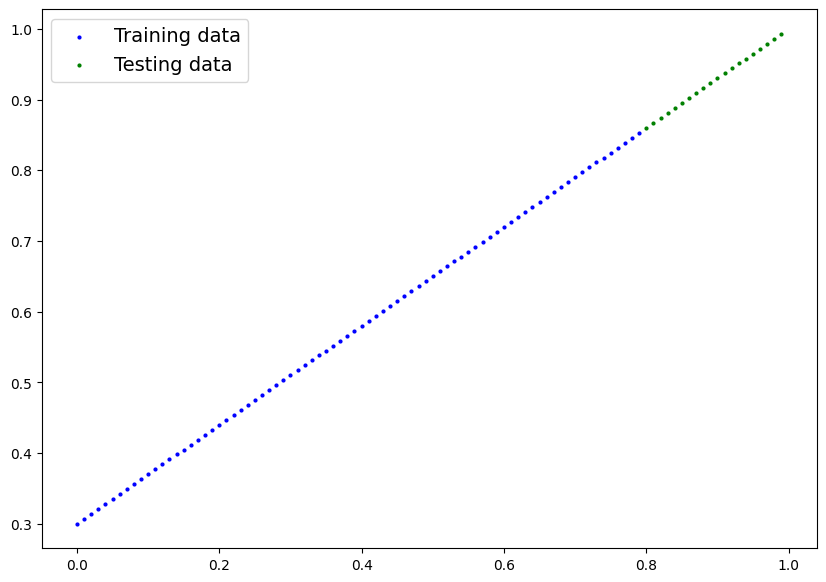

In [59]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [60]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [61]:
X_train_regression[:10],y_train_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

### Adjusting model_1 to fit a straight line

In [62]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [63]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [64]:
# Train the model
torch.manual_seed(100)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.28492, Test loss: 0.19691
Epoch: 100 | Train loss: 0.09272, Test loss: 0.00861
Epoch: 200 | Train loss: 0.09300, Test loss: 0.03869
Epoch: 300 | Train loss: 0.07868, Test loss: 0.02064
Epoch: 400 | Train loss: 0.07044, Test loss: 0.01409
Epoch: 500 | Train loss: 0.07615, Test loss: 0.03008
Epoch: 600 | Train loss: 0.04537, Test loss: 0.02281
Epoch: 700 | Train loss: 0.06470, Test loss: 0.00953
Epoch: 800 | Train loss: 0.06138, Test loss: 0.00602
Epoch: 900 | Train loss: 0.06782, Test loss: 0.01004


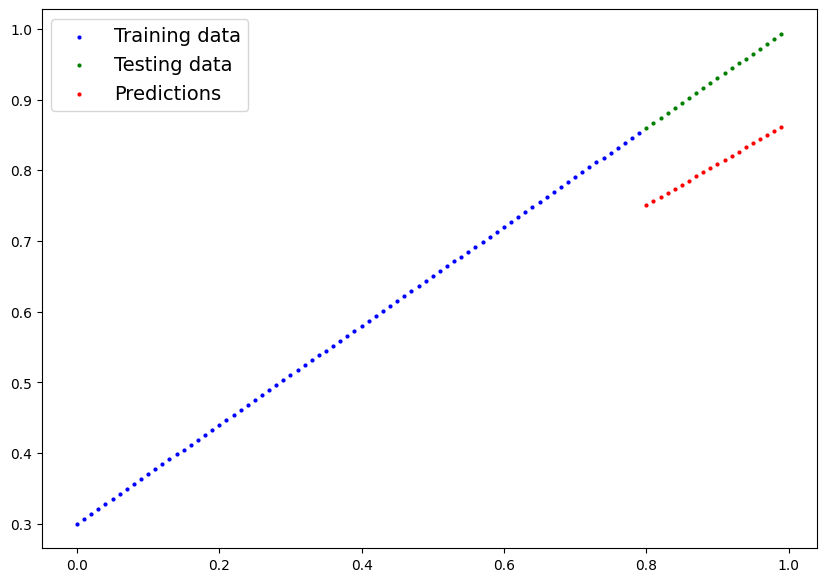

In [65]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

### The missing piece: non-linearity

### Recreating non-linear data (red and blue circles)

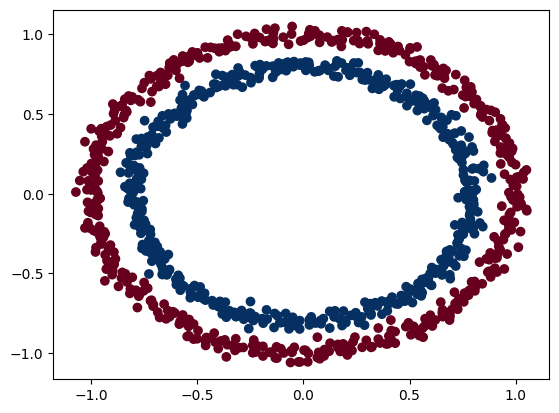

In [67]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=100,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [68]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=100)

X_train[:5], y_train[:5]

(tensor([[ 1.0185,  0.1074],
         [ 0.1258, -0.9372],
         [ 0.0194,  0.9787],
         [ 0.7262, -0.6754],
         [-0.9791,  0.1902]]),
 tensor([0., 0., 0., 0., 0.]))

#Building a model with non-linearity

* Linear=straight linear
* Non_linera=non straight lines

In [69]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [70]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

### Training a model with non-linearity

In [72]:
# Fit the model
torch.manual_seed(100)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.40580, Accuracy: 91.25% | Test Loss: 0.40796, Test Accuracy: 92.50%
Epoch: 100 | Loss: 0.29166, Accuracy: 97.62% | Test Loss: 0.29093, Test Accuracy: 96.00%
Epoch: 200 | Loss: 0.21415, Accuracy: 99.12% | Test Loss: 0.22026, Test Accuracy: 98.00%
Epoch: 300 | Loss: 0.15612, Accuracy: 99.38% | Test Loss: 0.16200, Test Accuracy: 99.00%
Epoch: 400 | Loss: 0.10742, Accuracy: 99.62% | Test Loss: 0.11392, Test Accuracy: 99.00%
Epoch: 500 | Loss: 0.07895, Accuracy: 99.62% | Test Loss: 0.08563, Test Accuracy: 99.00%
Epoch: 600 | Loss: 0.06126, Accuracy: 99.88% | Test Loss: 0.06855, Test Accuracy: 99.00%
Epoch: 700 | Loss: 0.04944, Accuracy: 99.88% | Test Loss: 0.05709, Test Accuracy: 99.00%
Epoch: 800 | Loss: 0.04092, Accuracy: 99.88% | Test Loss: 0.04876, Test Accuracy: 99.00%
Epoch: 900 | Loss: 0.03485, Accuracy: 100.00% | Test Loss: 0.04292, Test Accuracy: 99.00%


### Evaluating a model trained with non-linear activation functions

In [73]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-2.3114,  1.5715],
                      [-0.2306, -0.0559],
                      [ 0.0260,  1.2754],
                      [ 0.0434, -1.0239],
                      [-1.2612, -1.2497],
                      [-1.0354,  1.6182],
                      [ 0.6011,  0.8214],
                      [-0.5355,  2.1091],
                      [ 2.3986,  0.4527],
                      [-1.4689, -1.8282]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.4375,  0.5776, -0.1489,  1.3169, -0.5053,  2.0034, -0.3436, -0.2419,
                       0.0751,  0.0426], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.0175, -0.1621,  0.1790, -0.0485, -0.3055, -0.1819,  0.2785,  0.1273,
                       -0.2168,  0.2468],
                      [ 0.0103, -0.2995,  0.0905, -0.1244, -0.1150, -0.0086, -0.3046,  0.0073,
                        0.1984,  0.0625],
                      [ 1.6723, -0.079

In [74]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10]

(tensor([1., 1., 0., 1., 1., 1., 1., 0., 0., 1.], device='cuda:0'),
 tensor([0., 0., 1., 0., 1., 0., 0., 1., 1., 1.]))

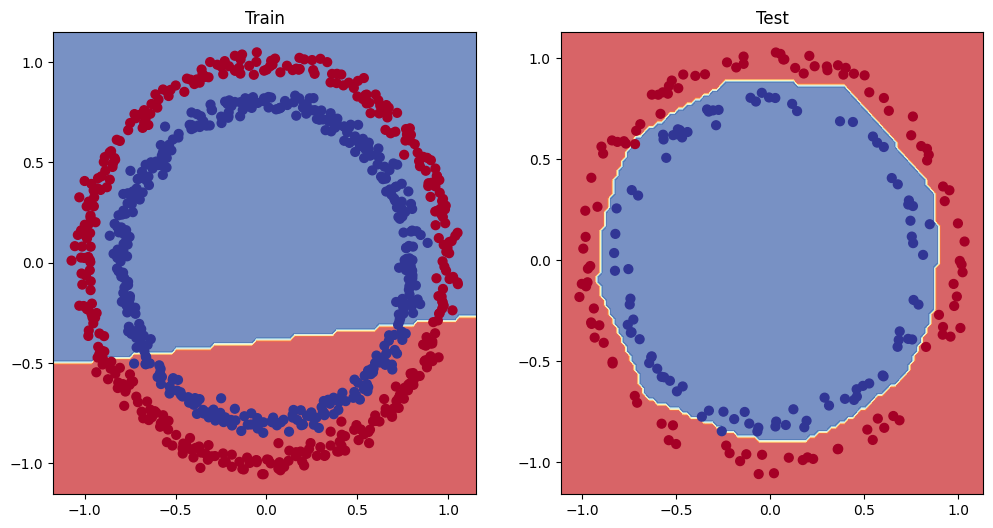

In [75]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

### Replicating non-linear activation functions

In [76]:
# Create a toy tensor (similar to the data going into our model(s))
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

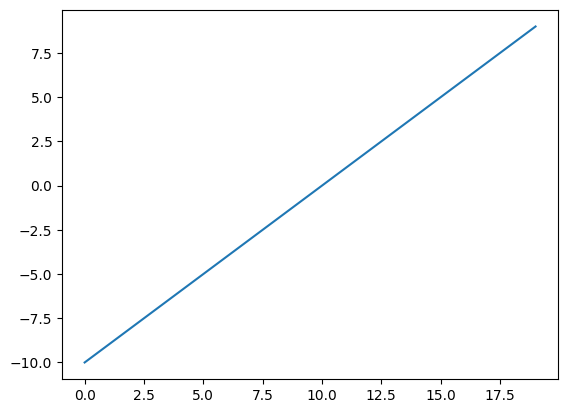

In [77]:
# Visualize the toy tensor
plt.plot(A);

In [78]:
# Create ReLU function by hand
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

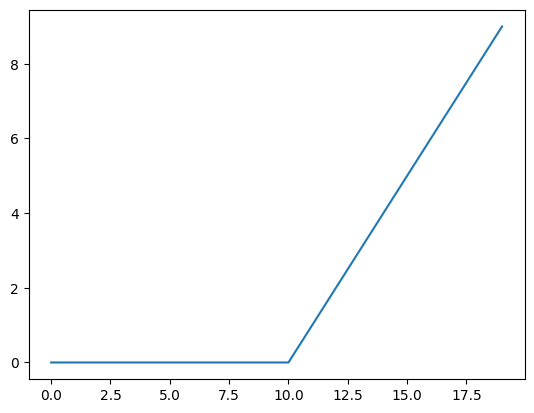

In [79]:
# Plot ReLU activated toy tensor
plt.plot(relu(A));

In [80]:
# Create a custom sigmoid function
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

# Test custom sigmoid on toy tensor
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

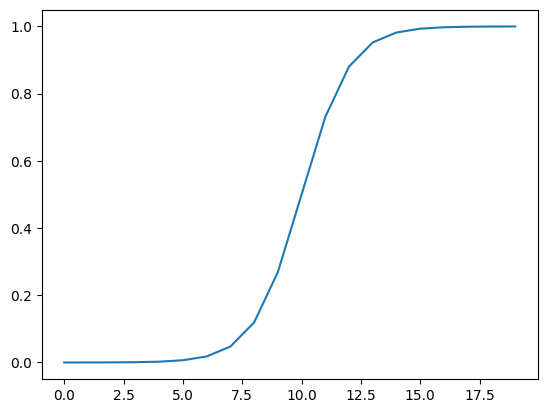

In [81]:
plt.plot(torch.sigmoid(A));

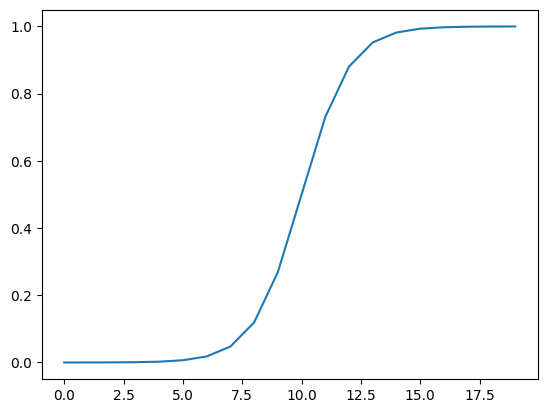

In [82]:
plt.plot(sigmoid(A));

** Putting things together by building a multi-class PyTorch model**

binary classification problem deals with classifying something as one of two options where as a multi-class classification problem deals with classifying something from a list of more than two options.

### Creating mutli-class classification data

tensor([[-0.2106,  8.0825],
        [ 2.2211,  6.2234],
        [ 1.9233,  3.1021],
        [ 3.1714,  6.0225],
        [ 1.6775,  7.2566]]) tensor([1, 3, 1, 3, 1])


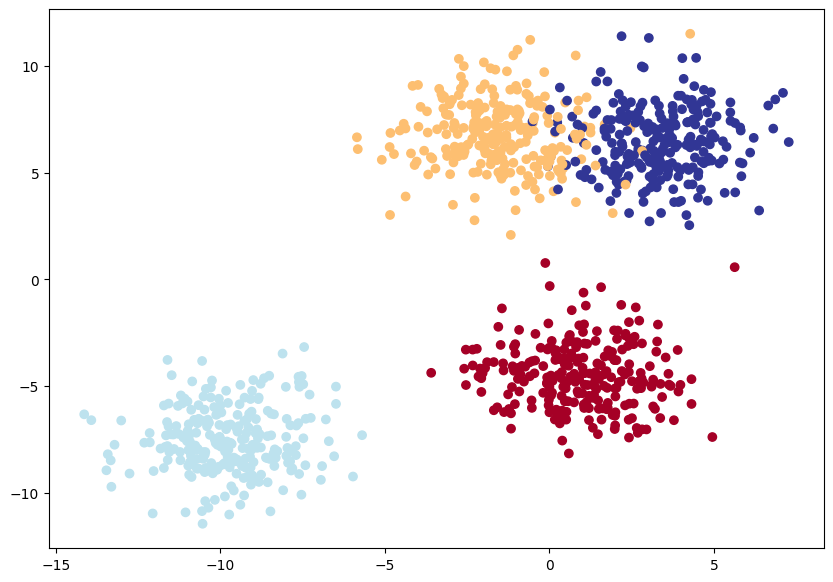

In [83]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 100

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### Building a multi-class classification model in PyTorch

nn.Module that takes in three hyperparameters:

* input_features - the number of X features coming into the model.

* output_features - the ideal numbers of output features we'd like (this will be equivalent to NUM_CLASSES or the number of classes in your multi-class classification problem).

* hidden_units - the number of hidden neurons we'd like each hidden layer to use.

In [84]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [85]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

** Creating a loss function and optimizer for a multi-class PyTorch model**

In [86]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

### Getting prediction probabilities for a multi-class PyTorch model

In [87]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5]

tensor([[ 0.0128,  1.9409,  1.5368, -0.6646],
        [-1.0311,  0.3365,  0.6088, -1.4821],
        [-0.9377,  0.5689,  0.8118, -1.4665],
        [-0.2848, -0.4584, -1.3516,  0.3601],
        [ 1.2610,  1.5420, -0.4847,  1.8138]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [88]:
# How many elements in a single prediction sample?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

In [89]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.4492, -0.4329, -1.1219,  0.0512],
        [ 1.5299,  2.0159, -0.1637,  1.9851],
        [-0.0509,  1.9585,  1.6363, -0.7892],
        [-0.7101,  0.6771,  0.6877, -1.1317],
        [-0.4827, -0.4282, -1.0757, -0.0115]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.2395, 0.2434, 0.1222, 0.3950],
        [0.2280, 0.3707, 0.0419, 0.3594],
        [0.0697, 0.5201, 0.3768, 0.0333],
        [0.1030, 0.4125, 0.4169, 0.0676],
        [0.2375, 0.2508, 0.1312, 0.3805]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [90]:
# Sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [91]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.2395, 0.2434, 0.1222, 0.3950], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(3, device='cuda:0')


### Creating a training and testing loop for a multi-class PyTorch model

In [92]:
# Fit the model
torch.manual_seed(100)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 2.08152, Acc: 24.12% | Test Loss: 1.06577, Test Acc: 51.50%
Epoch: 10 | Loss: 0.26924, Acc: 95.38% | Test Loss: 0.26919, Test Acc: 93.50%
Epoch: 20 | Loss: 0.15264, Acc: 96.38% | Test Loss: 0.17330, Test Acc: 94.00%
Epoch: 30 | Loss: 0.12336, Acc: 96.38% | Test Loss: 0.14664, Test Acc: 94.50%
Epoch: 40 | Loss: 0.11136, Acc: 96.25% | Test Loss: 0.13478, Test Acc: 95.00%
Epoch: 50 | Loss: 0.10511, Acc: 96.25% | Test Loss: 0.12799, Test Acc: 95.00%
Epoch: 60 | Loss: 0.10134, Acc: 96.38% | Test Loss: 0.12343, Test Acc: 95.00%
Epoch: 70 | Loss: 0.09884, Acc: 96.38% | Test Loss: 0.12003, Test Acc: 95.00%
Epoch: 80 | Loss: 0.09704, Acc: 96.38% | Test Loss: 0.11729, Test Acc: 95.00%
Epoch: 90 | Loss: 0.09567, Acc: 96.38% | Test Loss: 0.11499, Test Acc: 95.00%


**Making and evaluating predictions with a PyTorch multi-class model**

In [93]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  5.7410,  -7.2668,  -3.7514,  -3.4430],
        [  0.4629,   6.8166,  14.1665, -14.0343],
        [-11.1185,  14.2302,   4.5972,   7.2861],
        [ -5.4848,   4.9606,  -2.5346,   7.6589],
        [  5.4460,  -7.0513,  -3.9396,  -2.9505],
        [ -9.3235,  10.8719,   1.4825,   8.1727],
        [  6.0764,  -8.0499,  -4.6571,  -2.9822],
        [ -1.2117,   7.9745,  12.9615, -11.1143],
        [-10.5385,  13.7914,   4.9358,   6.3465],
        [  2.8970,  -4.3086,  -3.7336,  -0.3656]], device='cuda:0')

In [94]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([0, 2, 1, 3, 0, 1, 0, 2, 1, 0], device='cuda:0')
Labels: tensor([0, 2, 1, 3, 0, 1, 0, 2, 1, 0], device='cuda:0')
Test accuracy: 95.0%


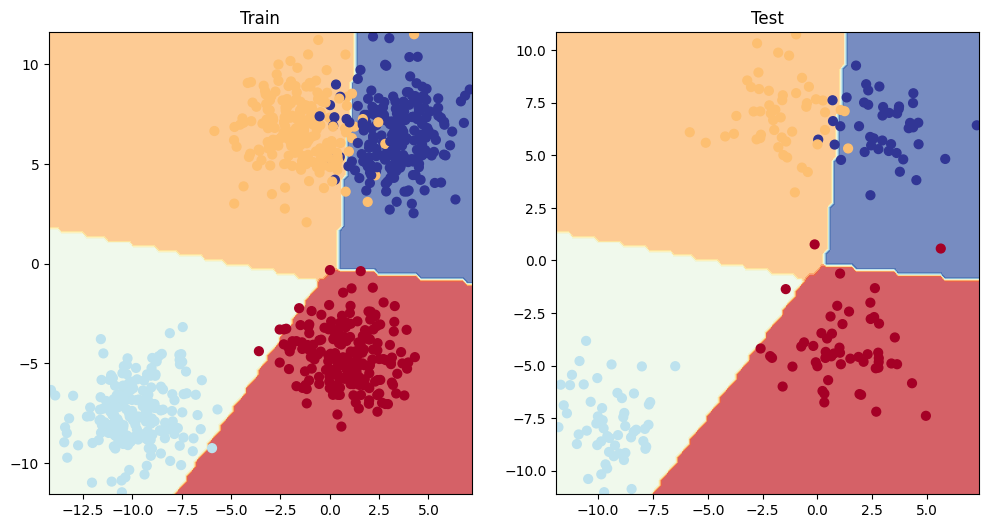

In [95]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

**More classification evaluation metrics**

In [96]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 kB 8.1 MB/s eta 0:00:00


tensor(0.9500, device='cuda:0')